# To Identify The Best Markets To Advertise

The goal in this project is to find out the two best markets to advertise product offering for an e-learning provider who would like to undertake a marketing campaign.

In [2]:
# to import the pandas and NumPy libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# So notebook displays multiple outputs at the same time
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Increase display output for rows and columns
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 500

To carry out this project, ideally, analysis would have to be carried out using data collected form a survey. This would generally be expensive, in terms of cost and time. A good way around this is to explore data that fits our analysis. One, such that fits our goal here, is that from freeCodeCamp. The following reasons apply:
 * They are also a and e-learning provider
 * Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis

The survey data is publicly available in this [GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

As such analys on this data is a good place to start. And so we begin...


In [3]:
# Read in csv file and explore
data_set = pd.read_csv('Desktop/2017-fCC-New-Coders-Survey-Data.csv', low_memory = False)

In [4]:
data_set.head()
data_set.shape

# To define a data set that can be worked with for the purpose of the analysis
data_1 = data_set.copy()

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

(18175, 136)

It is important to clarify if this data is relevant for out intended analysis. To do this, let us look deeper into the 'JobRoleInterest' column.

In [5]:
# Explore sample data
data_1['JobRoleInterest'].value_counts(normalize = True).head(10)*100
data_1['JobRoleInterest'].describe()

Full-Stack Web Developer                               11.770595
  Front-End Web Developer                               6.435927
  Data Scientist                                        2.173913
Back-End Web Developer                                  2.030892
  Mobile Developer                                      1.673341
Game Developer                                          1.630435
Information Security                                    1.315789
Full-Stack Web Developer,   Front-End Web Developer     0.915332
  Front-End Web Developer, Full-Stack Web Developer     0.800915
  Product Manager                                       0.786613
Name: JobRoleInterest, dtype: float64

count                         6992
unique                        3213
top       Full-Stack Web Developer
freq                           823
Name: JobRoleInterest, dtype: object

This data seems to have been collected by providing multiple options for selection. It would be interesting to explore what factors may corrolate to the individuals that have singular or multiple job interests. In relation with our goal, the frequency table suggests that this sample represents individuals with coding interests. The majority of roles of interest have to do with coding except for occurances of 'project management', 'product manager', etc. Without focusing on this, let us find out how many of these individuals are interested in Web or Mobile Development. 

Turning our attention to the series description, count is 6992, out of 18175 variables in sample data. This is very interesting, as it suggests that 18175 minus 6992 cells in this series are empty. This is worth investigating further. 'top' is Full-Stack Web Developer. This is encouraging for our analysis because this job role interest relates to our primary market.

6030

33.17744154057772

Text(0, 0.5, '')

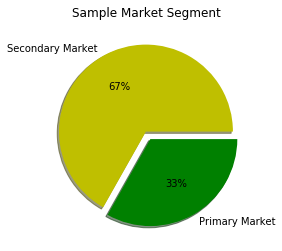

In [6]:
web_dev_seg = data_1['JobRoleInterest'].str.contains('Web Developer') # Create boolean index for individuals that are interested in Web Developer roles
mobi_dev_seg = data_1['JobRoleInterest'].str.contains('Mobile Developer') # Create boolean index for individuals that are interested in Mobile Developer roles

primary_market_abs = len(data_1['JobRoleInterest'][web_dev_seg | mobi_dev_seg]) # Identify number of individuals that are interested in web and mobile development (primary market)
primary_market_perc = len(data_1['JobRoleInterest'][web_dev_seg | mobi_dev_seg])/len(data_1) * 100 # Corresponding percentage of the primary market
primary_market_abs
primary_market_perc

# Create series to clearly define market segments
market_seg = (web_dev_seg | mobi_dev_seg).apply(lambda x: 'Primary Market' if x is True else 'Secondary Market') 

# Generate pie chat to illustrate market segment
market_seg.value_counts().plot.pie(autopct = '%.0f%%', colors = ('y', 'g'), shadow = True, explode = (0,0.1), title = 'Sample Market Segment') 
plt.ylabel("") # Plot edits

Therefore about 33% (6030 individuals from the sample) of the sample are interested in web and mobile development, which is the main market of our e-learning platform. This is not exactly a majority (not above 50%). Making inferences based on this whole sample would not be advisable becasue it does not represent our interests market. It might be a better idea to sample out only this 33% and focus our analysis on them to make better inferences about our target market. The fact that some individuals are interested in multiple role should be taken with a pinch of salt. This is because there is no ranking or preferences expressed with the multiple interests. The mere fact that they are interested in this is good enough for our analysis. Their other interest would probably be other coding courses that we provide. 

Text(0, 3, '11183')

Text(0, 3, '2213')

Text(0, 3, '1111')

Text(0, 3, '1064')

Text(0, 3, '842')

Text(0, 3, '761')

Text(0, 3, '470')

Text(0, 3, '270')

Text(0, 3, '123')

Text(0, 3, '69')

Text(0, 3, '33')

Text(0, 3, '21')

Text(0, 3, '13')

Text(0, 3, '2')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

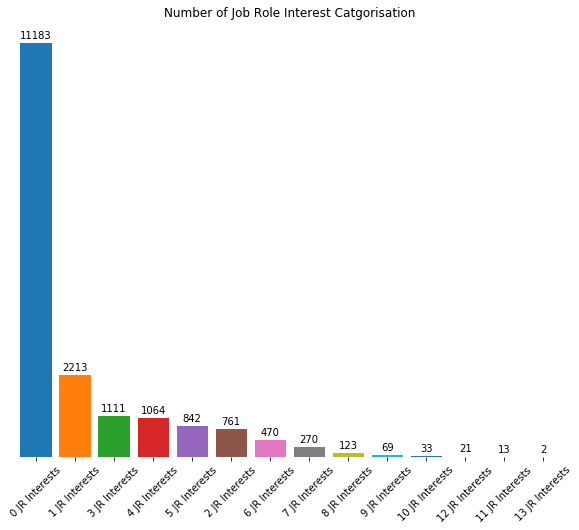

In [7]:
# Categorise sample by number of job-role-interests (jri)
no_of_jri = data_1['JobRoleInterest'].str.strip().str.split(',') # Convert each cell into a list of job role interest
no_of_jri = no_of_jri.apply(lambda x: 0 if x is np.nan else len(x)) # Count the number of job role interest

no_of_jri_freqd = no_of_jri.value_counts() # Generate corresponding frequency distribution table that categorises the sample by number of job role interests
no_of_jri_freqd.rename(lambda x: str(x) + ' ' + 'JR Interests', inplace = True) # Rename index 

# Visualise the result of the categorisation with a bar chart
bar_plot = no_of_jri_freqd.plot.bar(width = 0.8, figsize = (10,8), title = 'Number of Job Role Interest Catgorisation')

# Annotate each bar for a more comprehensive bar plot
for each in bar_plot.patches:
    height = each.get_height()
    plt.annotate('{}'.format(height),
                    xy=(each.get_x() + each.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    
plt.xticks(rotation= 45) # Rotate xaxis labels
plt.tick_params(
    axis='y',          # changes apply to the y-axis
    which='both',      # both major and minor ticks are affected
    left=False,      # ticks along the left edge are off
    right=False,         # ticks along the right edge are off
    labelleft=False) # labels along the left edge are off

# Remove axes borders
bar_plot.spines['right'].set_visible(False)
bar_plot.spines['top'].set_visible(False)
bar_plot.spines['left'].set_visible(False)
bar_plot.spines['bottom'].set_visible(False)


The bar chart above illustrates that a very large amount of the sample, 11183 (about 62% of the sample), do not have any job role interest. As such, this group shoud be excluded from our analysis. This would reduce our sample size significantly.

18175

6992

Text(0, 0.5, '')

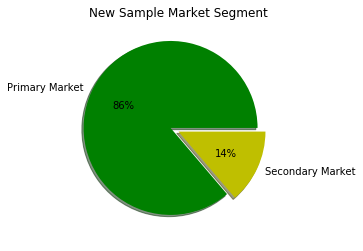

In [8]:
sample_size_with_zero_jri = 11183
total_sample_size = len(data_1['JobRoleInterest'])
total_sample_size

sample_size_with_relevant_jri = total_sample_size - sample_size_with_zero_jri
sample_size_with_relevant_jri

# Visualise this results in a pie chat, comparing sample with relevant job interest (secondary market) and primary market
idx_notna_var = data_1['JobRoleInterest'].notna() # Define index to filter new sample according to NaN row of the JobRoleInterest column
new_sample = data_1['JobRoleInterest'][idx_notna_var] # Define new sample

new_web_dev_seg = new_sample.str.contains('Web Developer') # Index web developer segment
new_mobi_dev_seg = new_sample.str.contains('Mobile Developer') # Index mobile developer segment

new_sample_market_segment = (new_web_dev_seg | new_mobi_dev_seg).apply(lambda x: 'Primary Market' if x is True else 'Secondary Market') # Create series to clearly define new market segments
new_sample_market_segment.value_counts().plot.pie(autopct = '%.0f%%', shadow = True, explode = (0.1, 0), title = 'New Sample Market Segment', colors = ('g', 'y')) # Generate pie chat to illustrate new market segment
plt.ylabel("") # Plot edits



This sample is more representative with our goal in mind. The Primary MArket (Web and Mobile Developmennt) is in a majority of 86%, while the Secondary Market which represents other coding courses is in a minority of 14%. This is much more acceptable for our analysis. Moving forward, all rows with np.nan in the JobRoleInterest column would be taken out from our sample. 

In [9]:
# Create the new sample for this analysis
data_2 = data_1[idx_notna_var].copy()
len(data_2) # Validate sample with size

6992

In [10]:
# Explore the CountryLive
data_2['CountryLive'].head(10)
data_2['CountryLive'].describe()
data_2['CountryLive'].unique()

1     United States of America
2     United States of America
3                       Brazil
4                     Portugal
6               United Kingdom
9                       Mexico
11                     Germany
13    United States of America
14    United States of America
15    United States of America
Name: CountryLive, dtype: object

count                         6838
unique                         137
top       United States of America
freq                          3125
Name: CountryLive, dtype: object

array(['United States of America', 'Brazil', 'Portugal', 'United Kingdom',
       'Mexico', 'Germany', 'Italy', 'Argentina', 'Venezuela', 'India',
       'Canada', 'Australia', 'Egypt', 'Lithuania', nan, 'Finland',
       'Bosnia & Herzegovina', 'Netherlands (Holland, Europe)', 'Kenya',
       'Switzerland', 'Hungary', 'Turkey', 'Poland', 'Great Britain',
       'Russia', 'China', 'Spain', 'Ireland', 'France', 'Nigeria', 'Iran',
       'Kyrgyzstan', 'Greece', 'Philippines', 'Georgia', 'Romania',
       'Norway', 'Peru', 'Iraq', 'Sweden', 'Bulgaria', 'Singapore',
       'Ukraine', 'Austria', 'New Zealand', 'Serbia', 'Bangladesh',
       'Belgium', 'Honduras', 'Puerto Rico', 'Denmark', 'Japan', 'Cyprus',
       'Ghana', 'Czech Republic', 'Macedonia', 'Costa Rica', 'Tunisia',
       'Chile', 'South Africa', 'Albania', 'Malaysia', 'Thailand',
       'Iceland', 'Pakistan', 'Guam', 'Indonesia', 'Algeria', 'Senegal',
       'Belarus', 'Sri Lanka', 'Israel', 'United Arab Emirates',
       'Vir

The results above show that each cell would only contain one country, unlike the JobInterestRole previously dealth with. Total number of rows is known to be 6992 and 'count' shows 6838. There are therefore about 154 cells that are empty or contain NaN. For the purpose of the analysis the column (CountryLive) allows us target the marketeting campagn. If their location is not available, it would be impossible to target them, and so, the 154 rows are irrelevant to our analysis. Before doing away with them, it should be investigated if there is any way to source this information from other columns in this data. In any case, 154 roles is only about 2.2% of our sample population, and so, it would be a huge loss to exclude this data from our analysis. Most of the surveyed sample appears to live in America. A frequency distribution of the column should be carried out next.

In [11]:
# Create frequency distribution (absolute and percentage) for the CountryLive column
country_live_freqd_abs = data_2['CountryLive'].value_counts()
country_live_freqd_perc = data_2['CountryLive'].value_counts(normalize = True)*100
country_live_freqd_abs.head(10)
country_live_freqd_perc.head(10)

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
Brazil                       129
Germany                      125
Australia                    112
Russia                       102
Ukraine                       89
Name: CountryLive, dtype: int64

United States of America    45.700497
India                        7.721556
United Kingdom               4.606610
Canada                       3.802281
Poland                       1.915765
Brazil                       1.886517
Germany                      1.828020
Australia                    1.637906
Russia                       1.491664
Ukraine                      1.301550
Name: CountryLive, dtype: float64

USA is the post potent market bar non! Up next is India. Any market that would be targeted for marketing should meet the criteria of having a majority of the primary market. It would also be reasonable to think about the marketing strategy. India has a very large population. Can this 8% of the market be effectively targeted. Is social media marketing the best option? How is internet connectivity in the country?

Previously, we found useful information about the location of new coders, and what are the countries where new coders live, but we need to go more in depth with our analysis before taking a decision. We can continue by figuring out how much money new coders are actually willing to spend on learning. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

The MoneyForLearning column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:

* These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
* Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

In [12]:
data_2['MonthsProgramming'] = data_2['MonthsProgramming'].astype(str).str.replace('^0', '1')

data_2['MoneyPerMonth'] = data_2['MoneyForLearning'] / data_2['MonthsProgramming'].astype(float)

data_2['MoneyPerMonth'].isna().sum() #NaN values out of our sample

data_2.dropna(subset = ['MoneyPerMonth'], inplace = True)

data_2[['MoneyPerMonth', 'CountryLive']].groupby('CountryLive').mean().loc[['United States of America', 'India', 'United Kingdom', 'Canada']].sort_values('MoneyPerMonth', ascending = False)
data_2[['MoneyPerMonth', 'CountryLive']].groupby('CountryLive').median().loc[['United States of America', 'India', 'United Kingdom', 'Canada']].sort_values('MoneyPerMonth', ascending = False)

675

,MoneyPerMonth
CountryLive,
United States of America,227.997996
India,135.100982
Canada,113.510961
United Kingdom,45.534443


,MoneyPerMonth
CountryLive,
United States of America,3.333333
India,0.000000
United Kingdom,0.000000
Canada,0.000000


The results for the United Kingdom and Canada are surprisingly low relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom, Canada, and India, or we have some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK and Canada. Or it might be that the results are correct.

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.333333
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,software development and IT,NaN,Employed for wages,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,25.0,14f1863afa9c7de488050b82eb3edd96,21ba173828fbe9e27ccebaf4d5166a55,13000.0,1.0,0.0,0.0,0.0,Within 7 to 12 months,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,work for a medium-sized company,1.0,"Front-End Web Developer, Back-End Web Develo...",no preference,Spanish,"single, never married",1000.0,5.0,2ed189768e,2017-03-09 00:37:58,2017-03-09 00:33:53,2017-03-09 00:40:14,2017-03-09 00:38:02,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Codenewbie,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,high school diploma or e

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

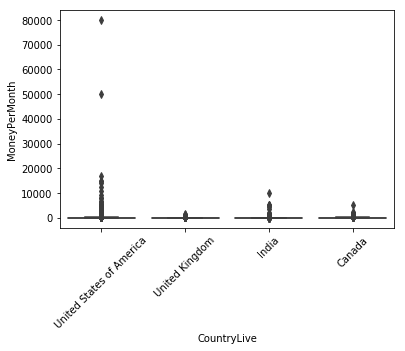

In [15]:
a = data_2['CountryLive'] == 'United States of America'
b = data_2['CountryLive'] == 'India'
c = data_2['CountryLive'] == 'United Kingdom'
d = data_2['CountryLive'] == 'Canada'

data_2[a | b | c | d].head()

sns.boxplot(x = 'CountryLive', y = 'MoneyPerMonth', data = data_2[a | b | c | d])
plt.xticks(rotation= 45)

The extreme outliers appear to be in the united states. Lets try making everything above 1000 dollars an outlier and rerun. Care should be taken with regards to excluding outliers based on the boxplot which are based on the median as a summary statistic of a sample. 

,MoneyPerMonth
CountryLive,
United States of America,183.800110
India,135.100982
Canada,113.510961
United Kingdom,45.534443


,MoneyPerMonth
CountryLive,
United States of America,3.333333
India,0.000000
United Kingdom,0.000000
Canada,0.000000


/Users/obiossai/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

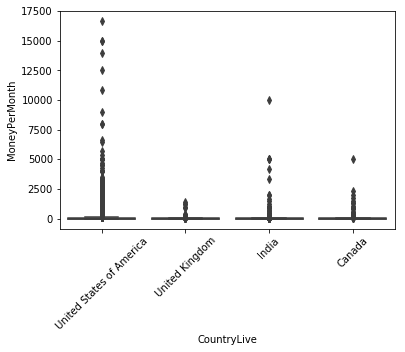

In [35]:
e = data_2['MoneyPerMonth'] <= 20000

data_2[['MoneyPerMonth', 'CountryLive']][e].groupby('CountryLive').mean().loc[['United States of America', 'India', 'United Kingdom', 'Canada']].sort_values('MoneyPerMonth', ascending = False)
data_2[['MoneyPerMonth', 'CountryLive']][e].groupby('CountryLive').median().loc[['United States of America', 'India', 'United Kingdom', 'Canada']].sort_values('MoneyPerMonth', ascending = False)


sns.boxplot(x = 'CountryLive', y = 'MoneyPerMonth', data = data_2[e][a | b | c | d])
plt.xticks(rotation= 45)